In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read json files in "Stress" folder
from glob import glob
for f_name in glob('Data/Stress/*.json'):
    user_df = pd.read_json(f_name)

# Prepare data

In [4]:
def get_date(row):
    date = row.split()[0] # get the date, leave out the time
    return date

def handle_NA(df,feature):
    '''
    This function takes in a dataframe and its feature that want to handle NA values with mean values
    input: dataframe, and its relevant features
    output: the feature of the dataframe with its NA values replaced by mean
    
    '''
    df[feature] = df[feature].replace(np.nan, np.mean(df[feature]))
    return df[feature]


def clean_resp_time(df):
    '''
    this function takes in a dataframe, and output a dataframe with clean resp time.
    input: data frame;
    output: data frame with nice-formatted resp_time
    '''
    
    df['resp_time'] = pd.to_datetime(df.resp_time)
    df.sort_values(by=['resp_time'],inplace=True)
    df.resp_time = df.resp_time.astype('str')
    df.resp_time = df.resp_time.apply(get_date)    
    df = df.groupby('resp_time').mean()
    df = df.reset_index()
    return df

In [7]:
def get_stress_data(f_name):
    user_df = pd.read_json(f_name)
    user_df.level = user_df.level.replace([4.0, 5.0], 0)  # Stress level: "4" means feeling good, "5" means feeling great, so convert to 0
    user_stress = user_df[['level','resp_time']]

    # clean date time data
    user_stress['resp_time'] = pd.to_datetime(user_stress.resp_time)
    user_stress.sort_values(by=['resp_time'],inplace=True)

    # handle NA values
    # user_stress = user_stress.dropna()
    user_stress.level = user_stress.level.replace(np.nan,np.mean(user_stress.level))
    user_stress.resp_time = user_stress.resp_time.astype('str')
    user_stress.resp_time = user_stress.resp_time.apply(get_date)    
    user_stress = user_stress.groupby('resp_time').mean()
    user_stress = user_stress.rename(columns = {'level':'stress_level'})
    user_stress = user_stress.reset_index()

    return user_stress

u44_stress = get_stress_data('Data/Stress/Stress_u44.json')
u44_stress.head()

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/si618/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

,resp_time,stress_level
0,2013-03-24,0.908046
1,2013-04-03,0.000000
2,2013-04-04,0.333333
3,2013-04-05,0.250000
4,2013-04-06,0.500000


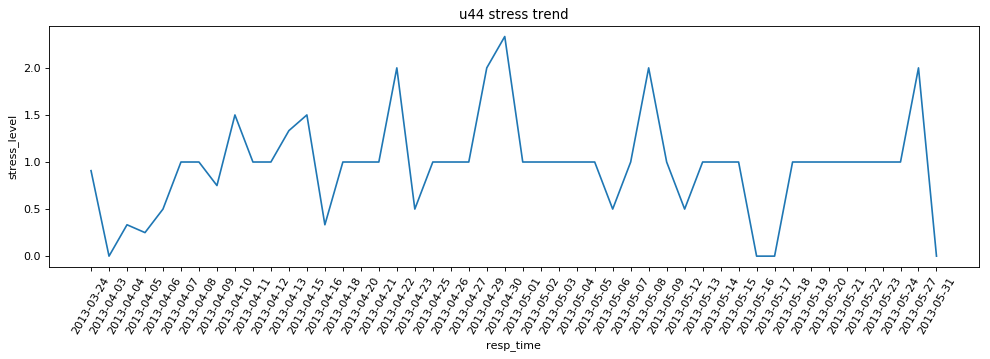

In [8]:
plt.figure(figsize=(15,4), dpi=80)
ax = sns.lineplot(x = u44_stress.resp_time, y = u44_stress.stress_level)
ax.set_xticklabels(labels = u44_stress.resp_time, rotation=60)
ax.set_title('u44 stress trend')
plt.show()

In [9]:
def get_actitivity_data(f_name):
    # read in activity data (u44)
    user_Activity = pd.read_json(f_name)
    user_Activity = user_Activity[['Social2','working','relaxing','resp_time']]

    # convert NA to mean value
    user_Activity['Social2'] = handle_NA(user_Activity,'Social2')
    user_Activity['working'] = handle_NA(user_Activity,'working')
    user_Activity['relaxing'] = handle_NA(user_Activity,'relaxing')
    
    user_Activity = clean_resp_time(user_Activity)
    
    return user_Activity

u44_activity = get_actitivity_data('Data/Activity/Activity_u44.json') 
u44_activity.head()  # working NA -> above average: because many missing values exist in working and relaxing
len(u44_activity)

42

In [10]:
def get_sleep_data(f_name):
    user_sleep = pd.read_json(f_name)
    user_sleep = user_sleep[['resp_time','hour','rate']]

    # convert NA to mean value
    user_sleep['hour'] = handle_NA(user_sleep,'hour')
    user_sleep['rate'] = handle_NA(user_sleep,'rate')
    user_sleep = user_sleep.rename(columns = {'hour':'sleep_hour','rate':'sleep_rate'})
    user_sleep = clean_resp_time(user_sleep)
    
    return user_sleep

u44_sleep = get_sleep_data('Data/Sleep/Sleep_u44.json')
len(u44_sleep)

52

In [11]:
def get_behavior_data(f_name):
    user_behavior = pd.read_json(f_name)
    user_behavior = user_behavior[['resp_time','anxious','calm','disorganized','enthusiastic', 'critical','conventional']]
    user_behavior.conventional = user_behavior.conventional.replace('null',np.nan).astype('float64')

    for col in ['anxious','calm','disorganized','enthusiastic','critical','conventional']:
        user_behavior[col] = handle_NA(user_behavior,col)

    user_behavior = clean_resp_time(user_behavior)
    return user_behavior

u44_behavior = get_behavior_data('Data/Behavior/Behavior_u44.json')
len(u44_behavior)

44

In [12]:
def get_exercise_date(f_name):
    user_exercise = pd.read_json('Data/Exercise/Exercise_u44.json')
    user_exercise = user_exercise[['resp_time','exercise']]
    user_exercise['exercise'] = handle_NA(user_exercise,'exercise')
    user_exercise = clean_resp_time(user_exercise)
    return user_exercise

u44_exercise = get_exercise_date('Data/Exercise/Exercise_u44.json')
len(u44_exercise)

38

In [13]:
def get_lab_data(f_name):
    user_lab = pd.read_json(f_name)
    user_lab = user_lab[['resp_time','duration']]
    user_lab['duration'] = handle_NA(user_lab,'duration')
    user_lab = clean_resp_time(user_lab)
    return user_lab

u44_lab = get_lab_data('Data/Lab/Lab_u44.json')
len(u44_lab)

6

In [14]:
def get_social_data(f_name):
    user_social = pd.read_json(f_name)
    user_social = user_social[['resp_time','number']]
    user_social['number'] = handle_NA(user_social,'number')
    user_social = user_social.rename(columns = {'number':'social_number'})
    user_social = clean_resp_time(user_social)
    return user_social

u44_social = get_social_data('Data/Social/Social_u44.json')
u44_social.head()
len(u44_social)

50

# Join dataframe & Plot

In [15]:
# join multiple dataframes
joined_df = pd.merge(u44_stress,u44_sleep,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_exercise,how='inner',on='resp_time') 
# joined_df = pd.merge(joined_df,u44_lab,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_activity,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_social,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_behavior,how='inner',on='resp_time') 
joined_df.head()

,resp_time,stress_level,sleep_hour,sleep_rate,exercise,Social2,working,relaxing,social_number,anxious,calm,disorganized,enthusiastic,critical,conventional
0,2013-04-03,0.000000,7.0,1.0,1,1.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
1,2013-04-04,0.333333,8.0,1.5,1,4.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
2,2013-04-05,0.250000,6.0,1.0,1,4.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
3,2013-04-07,1.000000,8.0,1.0,1,3.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
4,2013-04-08,1.000000,7.0,2.0,1,3.75,3.717949,1.743590,2.0,1.00,4.00,3.000000,2.000000,1.000000,4.0


In [19]:
# output clean data to csv file
joined_df.to_csv('Students/u44_data.csv')

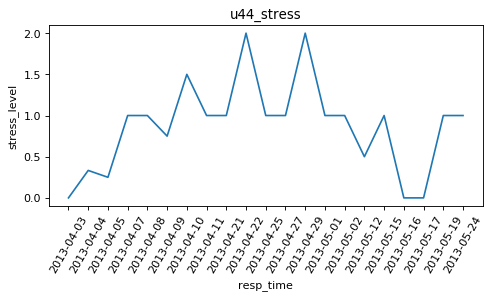

In [16]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.stress_level)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_stress')
plt.show()

In [17]:
# trial: lineplot with two y-axis


columns = ["stress_level", "sleep_hour"]
# test_data = pd.DataFrame.from_records([("date1", 1, 3, 150, 170),\
#                                        ("date2", 2, 6, 200, 180)],\
#                                        columns=columns)

test_data_melted = pd.melt(test_data, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")

# Scale the data, just a simple example of how you might determine the scaling
mask = test_data_melted.source.isin(['values_a', 'values_b'])
scale = int(test_data_melted[~mask].value_numbers.mean()
            /test_data_melted[mask].value_numbers.mean())
test_data_melted.loc[mask, 'value_numbers'] = test_data_melted.loc[mask, 'value_numbers']*scale

fig, ax1 = plt.subplots()
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted, ax=ax1)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('X and Y')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('A and B')

plt.show()

NameError: name 'test_data' is not defined

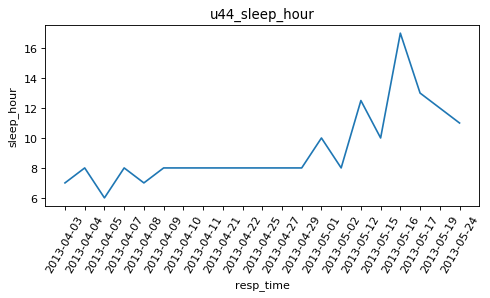

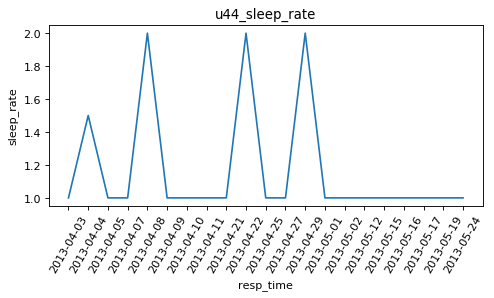

In [308]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.sleep_hour)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_sleep_hour')
plt.show()

plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.sleep_rate)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_sleep_rate')
plt.show()

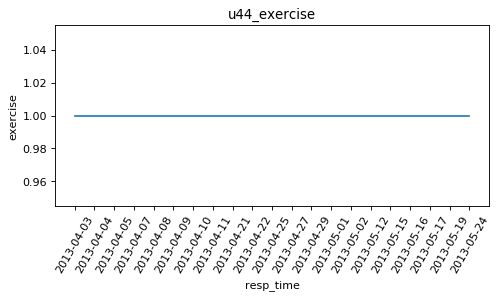

In [309]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.exercise)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_exercise')
plt.show()

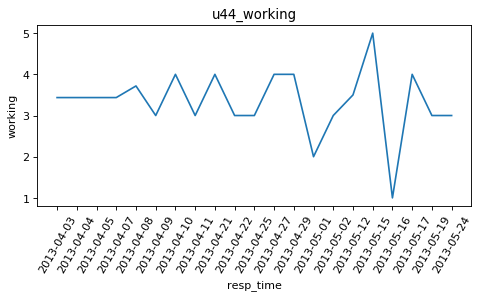

In [322]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.working)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_working')
plt.show()

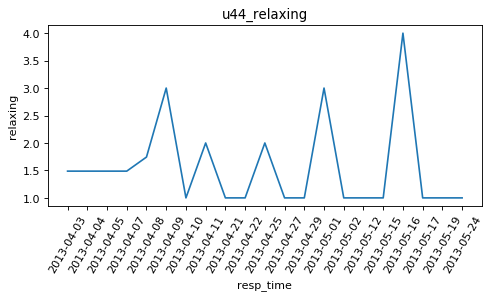

In [324]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.relaxing)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_relaxing')
plt.show()

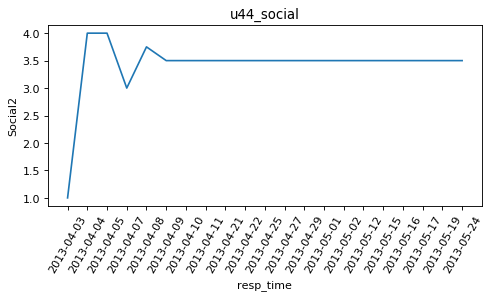

In [323]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.Social2)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_social')
plt.show()

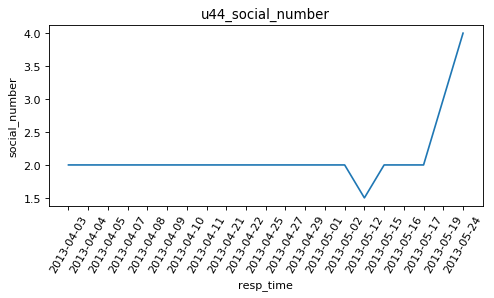

In [326]:
plt.figure(figsize=(7,3), dpi=80)
ax = sns.lineplot(x = joined_df.resp_time, y = joined_df.social_number)
ax.set_xticklabels(labels = joined_df.resp_time, rotation=60)
ax.set_title('u44_social_number')
plt.show()

# Granger Causality

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
